**Strategy:-**

1.Download dataset directly from **kaggle**... To do that we need to install **opendatasets** library..

2.As the datasets is very large, it's about **5.7 GB** so, we will take only 25% of train data (to work with whole data we need to use **gpu** with dask etc)...

In [5]:
#!pip install opendatasets

#### 1. First accept the competition.. 

#### 2. Go to kaggle profile then generate & download API key first...

#### 3. After that download Taxi-Fare datasets from kaggle directly from URL written below..

In [8]:
url = 'https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview'

In [3]:
import opendatasets as od

In [9]:
od.download(url)

100%|█████████████████████████████████████████████████████████████████████████████| 1.56G/1.56G [04:49<00:00, 5.79MB/s]



Extracting archive .\new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to .\new-york-city-taxi-fare-prediction


##### Starting  from here

In [1]:
data_dir = './new-york-city-taxi-fare-prediction'

In [2]:
import pandas as pd
import numpy as np
import random
import datetime

In [3]:
train_path = data_dir+'/train.csv'
test_path = data_dir+'/test.csv'

In [4]:
def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > 0.25

In [6]:
df = pd.read_csv(train_path, skiprows=skip_row)

In [7]:
print('Numbers of random rows selected from train dataset:', len(df))

Numbers of random rows selected from train dataset: 13855566


In [7]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
2,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
3,2009-11-06 01:04:03.0000002,4.1,2009-11-06 01:04:03 UTC,-73.991601,40.744712,-73.983081,40.744682,2
4,2011-04-05 17:11:05.0000001,7.7,2011-04-05 17:11:05 UTC,-74.001821,40.737547,-73.998060,40.722788,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13850055 entries, 0 to 13850054
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 845.3+ MB


In [9]:
df.pickup_datetime.min()

'2009-01-01 00:00:27 UTC'

In [10]:
df.pickup_datetime.max()

'2015-06-30 23:59:52 UTC'

In [11]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.385006e+07,1.385006e+07,1.385006e+07,1.384995e+07,1.384995e+07,1.385006e+07
mean,1.135270e+01,-7.251038e+01,3.991890e+01,-7.251472e+01,3.991799e+01,1.685792e+00
std,3.174259e+01,1.302955e+01,9.631221e+00,1.280125e+01,9.836285e+00,1.333523e+00
min,-3.000000e+02,-3.442060e+03,-3.478241e+03,-3.426601e+03,-3.488026e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073492e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075264e+01,-7.398016e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396708e+01,4.076711e+01,-7.396368e+01,4.076809e+01,2.000000e+00
max,9.396336e+04,3.456213e+03,3.376632e+03,3.457622e+03,3.407391e+03,2.080000e+02


In [45]:
test_df = pd.read_csv(test_path)

In [13]:
len(test_df)

9914

In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 non-null   float64
 4   dropoff_longitude  9914 non-null   float64
 5   dropoff_latitude   9914 non-null   float64
 6   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 542.3+ KB


In [15]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


**dropping the rows containing any null values if any from train dataset**

In [16]:
df = df.dropna().copy()

In [17]:
print('Numbers train dataset after dropping null:', len(df))

Numbers train dataset after dropping null: 13849950


## removing some outliers

**fare_amount-> 1 to 500**

**longitude in between-> -75 to -72**

**latitude in between-> 40 to 42** 

**person-> 1 to 6** 

In [8]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) & (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) & (df['pickup_longitude'] <= -72) & 
              (df['dropoff_longitude'] >= -75) & (df['dropoff_longitude'] <= -72) & 
              (df['pickup_latitude'] >= 40) & (df['pickup_latitude'] <= 42) & 
              (df['dropoff_latitude'] >=40) & (df['dropoff_latitude'] <= 42) & 
              (df['passenger_count'] >= 1) & (df['passenger_count'] <= 6)]

In [9]:
train = remove_outliers(df)

In [10]:
print('outliers removed:',(len(df) - len(train)))

outliers removed: 340934


In [11]:
del df

In [12]:
len(train)

13514632

In [13]:
train.tail()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
13855561,2014-09-22 09:00:00.00000019,16.5,2014-09-22 09:00:00 UTC,-73.977880,40.763550,-73.974020,40.743170,6
13855562,2015-06-13 20:45:19.0000001,18.0,2015-06-13 20:45:19 UTC,-73.987335,40.755325,-74.015221,40.710213,2
13855563,2010-05-28 07:49:50.0000002,11.7,2010-05-28 07:49:50 UTC,-73.947156,40.780228,-73.976806,40.758867,2
13855564,2011-09-16 00:46:43.0000005,6.1,2011-09-16 00:46:43 UTC,-73.990946,40.736619,-73.992298,40.740316,3
13855565,2014-12-12 11:33:00.00000015,7.5,2014-12-12 11:33:00 UTC,-73.969722,40.797668,-73.970885,40.783313,1


In [24]:
train.duplicated().sum()

0

**seperating pickup_datetime column into year, month, day, weekday and hours**

**converting object data to datetime data**

In [14]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

making different columns for **year**, **month**, **day**, **weekday** & **hour**

In [16]:
def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [17]:
add_dateparts(train, 'pickup_datetime')

In [18]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
0,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7
1,2012-04-08 07:30:50.0000002,5.3,2012-04-08 07:30:50+00:00,-73.996335,40.737142,-73.980721,40.733559,1,2012,4,8,6,7
2,2009-11-06 01:04:03.0000002,4.1,2009-11-06 01:04:03+00:00,-73.991601,40.744712,-73.983081,40.744682,2,2009,11,6,4,1
3,2014-12-06 20:36:22.0000008,4.0,2014-12-06 20:36:22+00:00,-73.979815,40.751902,-73.979446,40.755481,1,2014,12,6,5,20
4,2010-09-07 13:18:00.000000175,10.5,2010-09-07 13:18:00+00:00,-73.985382,40.747858,-73.978377,40.762070,1,2010,9,7,1,13


### Popular landmarks longitude & latitude

JFK AIRPORT

LGA AIRPORT

EWR AIRPORT

TIME SQUARE

MET MEUSEUM

WORLD TRADE CENTRE

In [19]:
jfk_lonlat = -73.7781, 40.6413  
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

##### making function to calculate global distance between two points

In [20]:
def haversine_np(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return round(km,2)

In [21]:
def add_landmark(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [22]:
for name, lonlat in [('jkf', jfk_lonlat), ('lga', lga_lonlat), 
                     ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
    add_landmark(train, name, lonlat)

In [23]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,jkf_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
0,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,21.84,7.00,21.12,0.73,9.09
1,2012-04-08 07:30:50.0000002,5.3,2012-04-08 07:30:50+00:00,-73.996335,40.737142,-73.980721,40.733559,1,2012,4,8,6,7,19.92,10.19,17.04,5.30,3.39
2,2009-11-06 01:04:03.0000002,4.1,2009-11-06 01:04:03+00:00,-73.991601,40.744712,-73.983081,40.744682,2,2009,11,6,4,1,20.74,9.85,17.25,4.21,4.22
3,2014-12-06 20:36:22.0000008,4.0,2014-12-06 20:36:22+00:00,-73.979815,40.751902,-73.979446,40.755481,1,2014,12,6,5,20,21.18,9.19,17.99,2.99,5.41
4,2010-09-07 13:18:00.000000175,10.5,2010-09-07 13:18:00+00:00,-73.985382,40.747858,-73.978377,40.762070,1,2010,9,7,1,13,21.56,8.94,18.38,2.31,6.10


In [24]:
train = train.drop(['key','pickup_datetime'], axis=1)

In [25]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,jkf_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
0,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,21.84,7.00,21.12,0.73,9.09
1,5.3,-73.996335,40.737142,-73.980721,40.733559,1,2012,4,8,6,7,19.92,10.19,17.04,5.30,3.39
2,4.1,-73.991601,40.744712,-73.983081,40.744682,2,2009,11,6,4,1,20.74,9.85,17.25,4.21,4.22
3,4.0,-73.979815,40.751902,-73.979446,40.755481,1,2014,12,6,5,20,21.18,9.19,17.99,2.99,5.41
4,10.5,-73.985382,40.747858,-73.978377,40.762070,1,2010,9,7,1,13,21.56,8.94,18.38,2.31,6.10


In [26]:
len(train)

13514632

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

### EDA

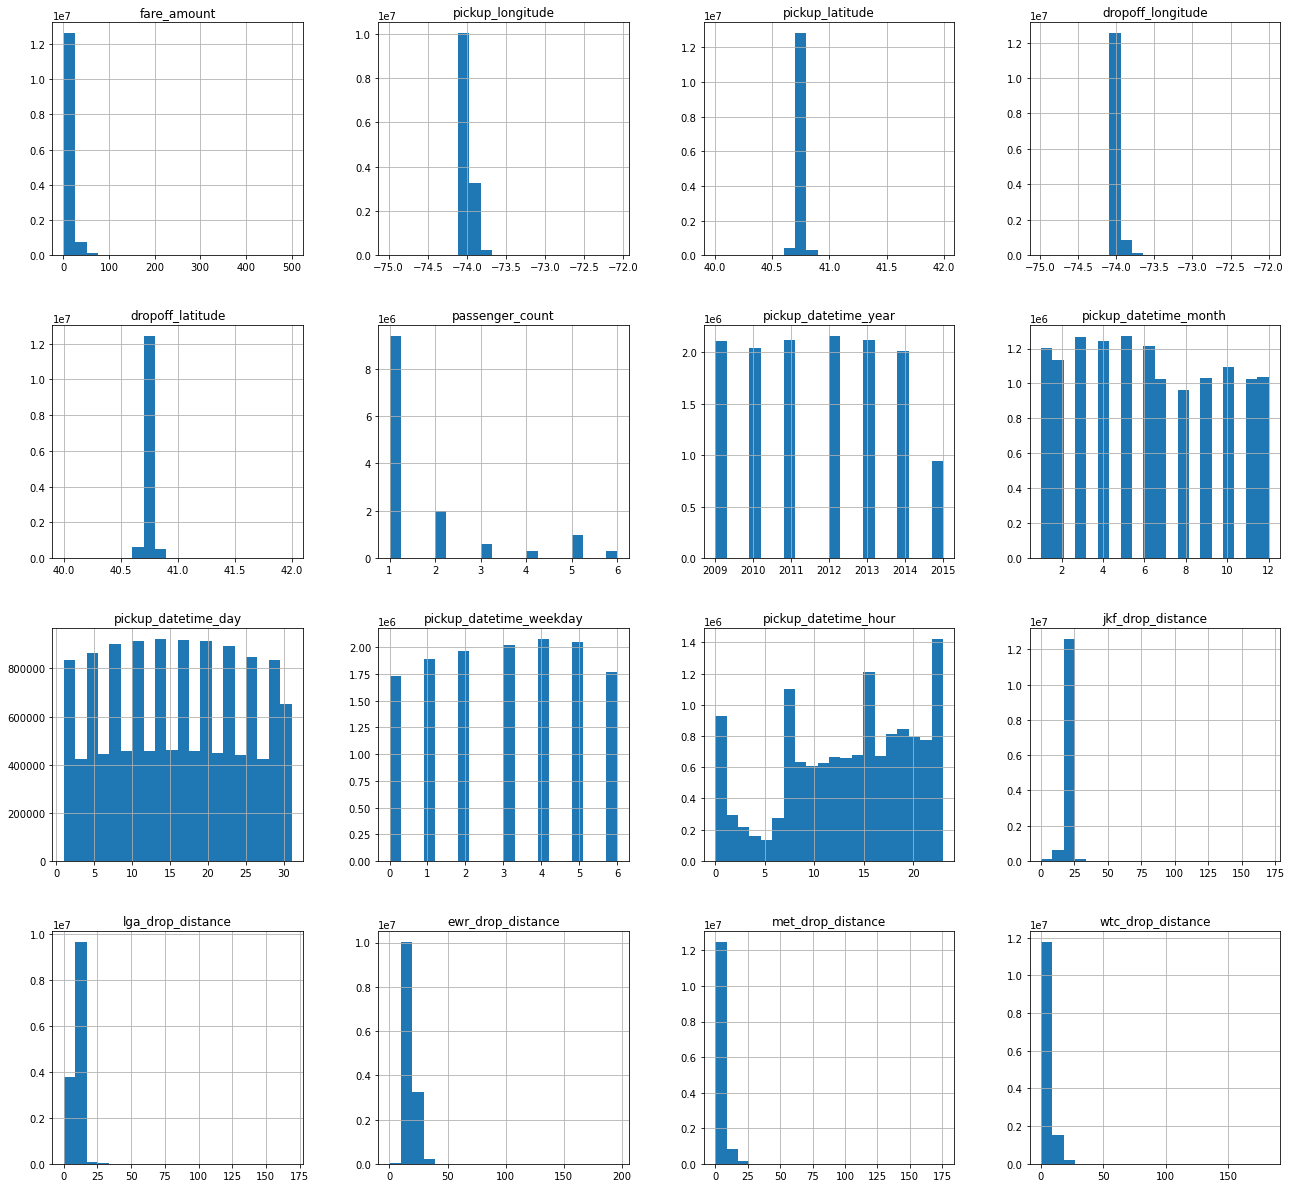

In [28]:
train.hist(figsize=(22,21), bins=20);

**busiest month, week-day & hour**

In [29]:
train.pickup_datetime_month.mode(), train.pickup_datetime_weekday.mode(), train.pickup_datetime_hour.mode()

(0    5
 dtype: int64,
 0    4
 dtype: int64,
 0    19
 dtype: int64)

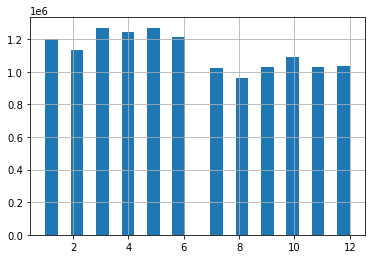

In [31]:
train.pickup_datetime_month.hist(bins=24);

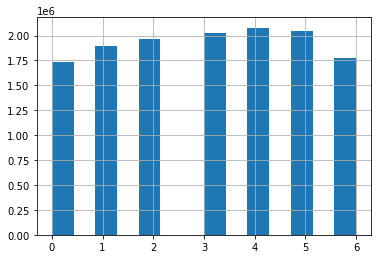

In [32]:
train.pickup_datetime_weekday.hist(bins=14);

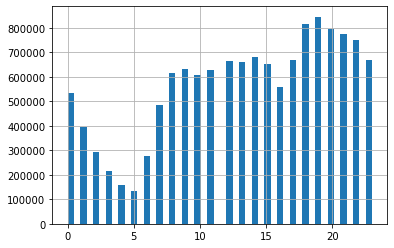

In [33]:
train.pickup_datetime_hour.hist(bins=48);

**highest fares month**

In [34]:
train= train.sort_values(ascending=False, by='fare_amount')

In [35]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,jkf_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
7117113,500.0,-73.975308,40.621535,-73.975308,40.621535,1,2011,5,1,6,12,16.78,19.26,18.41,17.57,10.53
4943793,500.0,-73.976692,40.751629,-73.976692,40.751621,1,2015,1,5,0,12,20.74,9.09,18.03,3.29,5.16
9263460,498.0,-73.816711,40.740044,-73.816711,40.740044,2,2015,2,2,0,4,11.45,6.33,30.66,13.08,16.55
9261851,495.0,-73.925878,40.740358,-73.925892,40.740357,1,2010,11,24,2,18,16.62,5.96,21.69,5.36,7.72
61995,495.0,-73.814911,40.699562,-72.196091,41.012253,1,2015,5,12,1,13,139.26,143.35,170.12,150.67,156.03


##### average drop distances in different main points in km

In [36]:
train.jkf_drop_distance.mean()

20.911970326684205

In [37]:
# 6. What is the average ride distance?
train.lga_drop_distance.mean()

9.687369945394149

In [38]:
train.ewr_drop_distance.mean()

18.480465881722374

In [39]:
train.met_drop_distance.mean()

4.4873136871216674

In [40]:
train.wtc_drop_distance.mean()

5.968938933738401

In [41]:
print('minimum fare:{}, maximum fare:{}, average fare:{}'.format(train.fare_amount.min(),
                                                                train.fare_amount.max(),round(train.fare_amount.mean(),2)))

minimum fare:1.0, maximum fare:500.0, average fare:11.33


#### corelation diagram between the features

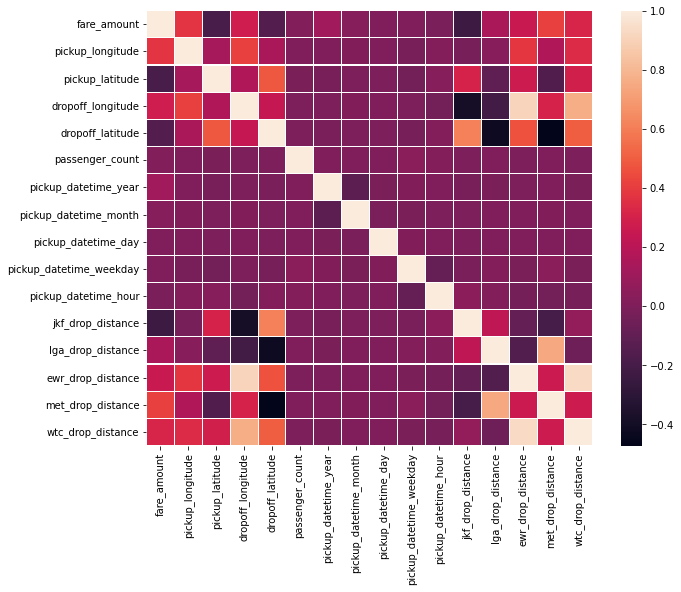

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),linewidths=0.1)
plt.show()

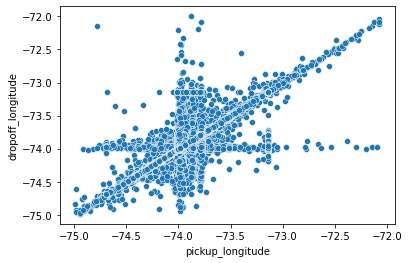

In [50]:
sns.scatterplot(x=train.pickup_longitude, y=train.dropoff_longitude)
plt.show()

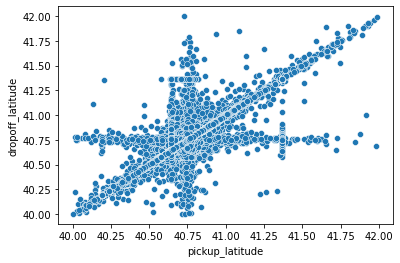

In [51]:
sns.scatterplot(x=train.pickup_latitude, y=train.dropoff_latitude)
plt.show()

#### working with test data pipeline

In [43]:
def test_pipeline(test_df):
    test_df['pickup_datetime'] = pd.to_datetime(test_df['pickup_datetime'])
    add_dateparts(test_df, 'pickup_datetime')
    
    for name, lonlat in [('jkf', jfk_lonlat), ('lga', lga_lonlat), 
                     ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
        
        add_landmark(test_df, name, lonlat)
    test_df = test_df.drop(['pickup_datetime','key'], axis=1)
    
    return test_df

In [46]:
test_df = test_pipeline(test_df)

In [47]:
test_df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,jkf_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,20.58,9.76,17.35,4.24,4.22
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,21.55,11.32,15.79,5.38,3.10
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,20.59,9.53,17.58,3.95,4.51
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,21.69,10.20,16.97,3.84,4.64
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,21.11,10.30,16.81,4.43,3.97


#### splitting data into train and validation

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
train_df, val_df = train_test_split(train, test_size=0.2, random_state=42)

In [62]:
len(train_df), len(val_df)

(10807801, 2701951)

In [63]:
train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'jkf_drop_distance',
       'lga_drop_distance', 'ewr_drop_distance', 'met_drop_distance',
       'wtc_drop_distance'],
      dtype='object')

In [64]:
x_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'jkf_drop_distance',
       'lga_drop_distance', 'ewr_drop_distance', 'met_drop_distance',
       'wtc_drop_distance']
y_cols = 'fare_amount'

In [65]:
x_train = train_df[x_cols]
y_train = train_df[y_cols]

In [66]:
x_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,jkf_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
3695519,-73.929825,40.798866,-73.938881,40.805061,1,2015,5,22,4,11,22.68,6.29,23.63,3.51,11.89
11216172,-73.951903,40.777088,-73.961367,40.774184,1,2012,8,8,2,8,21.36,7.36,20.26,0.60,7.97
5654469,-73.984304,40.747818,-73.976878,40.752148,1,2010,5,3,0,18,20.79,9.09,18.04,3.24,5.20
3376032,-73.945727,40.777713,-73.929480,40.807882,1,2011,2,28,0,20,22.48,5.80,24.47,4.25,12.57
10151063,-73.966717,40.757422,-73.975892,40.744847,1,2012,8,3,4,16,20.25,9.29,17.82,3.99,4.59


In [67]:
y_train.head()

3695519     6.0
11216172    5.7
5654469     5.3
3376032     8.9
10151063    5.3
Name: fare_amount, dtype: float64

In [68]:
x_val = val_df[x_cols]
y_val = val_df[y_cols]

In [69]:
test_df.columns == x_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

### Modeling and Evaluation

In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [71]:
def evaluate(model):
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    val_pred = model.predict(x_val)
    val_rmse = mean_squared_error(y_val, val_pred, squared=False)
    r2_train= r2_score(y_train, train_pred)
    r2_val = r2_score(y_val, val_pred)
    print('train RMSE                 :', train_rmse)
    print('validatin RMSE             :', val_rmse)
    print('R2 Score on Validation data:',r2_val)
    print('R2 Score on training data  :',r2_train)
    return model

#### 1. Ridge regression

In [75]:
from sklearn.linear_model import Ridge

model_R = Ridge(random_state=42)

In [76]:
model_R = evaluate(model_R)

train RMSE                 : 7.138005004964509
validatin RMSE             : 7.097106118355579
R2 Score on Validation data: 0.4630785503489425
R2 Score on training data  : 0.45821869743865684


#### 2. Random Forest

In [77]:
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=7, n_estimators=50)

In [79]:
model_RF = evaluate(model_RF)

train RMSE                 : 4.772996579671811
validatin RMSE             : 4.744059802211797
R2 Score on Validation data: 0.760089936302232
R2 Score on training data  : 0.757756259949696


#### 3. XGboost

In [ ]:
#!pip install xgboost

In [80]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')

In [82]:
model_xgb = evaluate(model_xgb)

train RMSE                 : 3.824104849574973
validatin RMSE             : 3.7910113226739752
R2 Score on Validation data: 0.8468001573723913
R2 Score on training data  : 0.8445001769007555


#### 4. light GBM model

In [ ]:
#!pip install lightgbm

In [83]:
import lightgbm as lgb

In [84]:
params = {
    'objective': 'regression',
    'max_bin': 300,
    'learning_rate': 0.025,
    'num_leaves': 40,
}

In [104]:
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_val, y_val,reference=lgb_train)
model_lgb1 = lgb.train(params, lgb_train,
                      valid_sets=[lgb_train, lgb_eval],
                      verbose_eval=10,
                      num_boost_round=5000,
                      early_stopping_rounds=20)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.168607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2791
[LightGBM] [Info] Number of data points in the train set: 10807801, number of used features: 15
[LightGBM] [Info] Start training from score 11.331366
Training until validation scores don't improve for 20 rounds
[10]	training's l2: 68.4865	valid_1's l2: 68.1752
[20]	training's l2: 52.5314	valid_1's l2: 52.1527
[30]	training's l2: 42.239	valid_1's l2: 41.8018
[40]	training's l2: 35.6255	valid_1's l2: 35.1329
[50]	training's l2: 31.2171	valid_1's l2: 30.6867
[60]	training's l2: 28.217	valid_1's l2: 27.6507
[70]	training's l2: 26.0614	valid_1's l2: 25.4618
[80]	training's l2: 24.3551	valid_1's l2: 23.7313
[90]	training's l2: 23.1023	valid_1's l2: 22.458
[100]	training's l2: 22.0869	valid_1's l2: 21.4281
[110]	training's l2: 21.2675

[1520]	training's l2: 13.8248	valid_1's l2: 13.6714
[1530]	training's l2: 13.816	valid_1's l2: 13.6669
[1540]	training's l2: 13.8087	valid_1's l2: 13.6636
[1550]	training's l2: 13.8003	valid_1's l2: 13.658
[1560]	training's l2: 13.7919	valid_1's l2: 13.6534
[1570]	training's l2: 13.7841	valid_1's l2: 13.6487
[1580]	training's l2: 13.775	valid_1's l2: 13.6443
[1590]	training's l2: 13.7676	valid_1's l2: 13.6407
[1600]	training's l2: 13.7593	valid_1's l2: 13.6343
[1610]	training's l2: 13.7527	valid_1's l2: 13.6303
[1620]	training's l2: 13.7455	valid_1's l2: 13.6256
[1630]	training's l2: 13.7379	valid_1's l2: 13.6195
[1640]	training's l2: 13.7307	valid_1's l2: 13.6148
[1650]	training's l2: 13.7226	valid_1's l2: 13.6086
[1660]	training's l2: 13.7129	valid_1's l2: 13.6011
[1670]	training's l2: 13.7068	valid_1's l2: 13.5988
[1680]	training's l2: 13.7017	valid_1's l2: 13.5964
[1690]	training's l2: 13.6948	valid_1's l2: 13.5929
[1700]	training's l2: 13.6879	valid_1's l2: 13.5901
[1710]	training

[3110]	training's l2: 12.8991	valid_1's l2: 13.1672
[3120]	training's l2: 12.8948	valid_1's l2: 13.1647
[3130]	training's l2: 12.8902	valid_1's l2: 13.1646
[3140]	training's l2: 12.8867	valid_1's l2: 13.1632
[3150]	training's l2: 12.8831	valid_1's l2: 13.1623
[3160]	training's l2: 12.8789	valid_1's l2: 13.1609
[3170]	training's l2: 12.8751	valid_1's l2: 13.1592
[3180]	training's l2: 12.8717	valid_1's l2: 13.1574
[3190]	training's l2: 12.8684	valid_1's l2: 13.1566
[3200]	training's l2: 12.8646	valid_1's l2: 13.1556
[3210]	training's l2: 12.8611	valid_1's l2: 13.154
[3220]	training's l2: 12.8563	valid_1's l2: 13.1522
[3230]	training's l2: 12.8531	valid_1's l2: 13.152
[3240]	training's l2: 12.8488	valid_1's l2: 13.1497
[3250]	training's l2: 12.8444	valid_1's l2: 13.148
[3260]	training's l2: 12.8406	valid_1's l2: 13.147
[3270]	training's l2: 12.8369	valid_1's l2: 13.1463
[3280]	training's l2: 12.8332	valid_1's l2: 13.145
[3290]	training's l2: 12.8296	valid_1's l2: 13.1432
[3300]	training's

[4700]	training's l2: 12.3779	valid_1's l2: 12.9666
[4710]	training's l2: 12.3746	valid_1's l2: 12.9655
[4720]	training's l2: 12.372	valid_1's l2: 12.965
[4730]	training's l2: 12.3691	valid_1's l2: 12.9639
[4740]	training's l2: 12.3658	valid_1's l2: 12.9623
[4750]	training's l2: 12.363	valid_1's l2: 12.9618
[4760]	training's l2: 12.3604	valid_1's l2: 12.9605
[4770]	training's l2: 12.3578	valid_1's l2: 12.9597
[4780]	training's l2: 12.3546	valid_1's l2: 12.9581
[4790]	training's l2: 12.3518	valid_1's l2: 12.958
[4800]	training's l2: 12.349	valid_1's l2: 12.9578
[4810]	training's l2: 12.3469	valid_1's l2: 12.9574
[4820]	training's l2: 12.3447	valid_1's l2: 12.9566
[4830]	training's l2: 12.3419	valid_1's l2: 12.9561
[4840]	training's l2: 12.3392	valid_1's l2: 12.9549
[4850]	training's l2: 12.337	valid_1's l2: 12.9539
[4860]	training's l2: 12.3344	valid_1's l2: 12.9533
[4870]	training's l2: 12.3322	valid_1's l2: 12.9527
[4880]	training's l2: 12.3297	valid_1's l2: 12.9515
[4890]	training's 

In [132]:
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_val, y_val,reference=lgb_train)
model_lgb2 = lgb.train(params, lgb_train,
                      valid_sets=[lgb_train, lgb_eval],
                      verbose_eval=10,
                      num_boost_round=8000,
                      early_stopping_rounds=20)
    

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.134778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2791
[LightGBM] [Info] Number of data points in the train set: 10807801, number of used features: 15
[LightGBM] [Info] Start training from score 11.331366
Training until validation scores don't improve for 20 rounds
[10]	training's l2: 68.4865	valid_1's l2: 68.1752
[20]	training's l2: 52.5314	valid_1's l2: 52.1527
[30]	training's l2: 42.239	valid_1's l2: 41.8018
[40]	training's l2: 35.6255	valid_1's l2: 35.1329
[50]	training's l2: 31.2171	valid_1's l2: 30.6867
[60]	training's l2: 28.217	valid_1's l2: 27.6507
[70]	training's l2: 26.0614	valid_1's l2: 25.4618
[80]	training's l2: 24.3551	valid_1's l2: 23.7313
[90]	training's l2: 23.1023	valid_1's l2: 22.458
[100]	training's l2: 22.0869	valid_1's l2: 21.4281
[110]	training's l2: 21.2675

[1520]	training's l2: 13.8248	valid_1's l2: 13.6714
[1530]	training's l2: 13.816	valid_1's l2: 13.6669
[1540]	training's l2: 13.8087	valid_1's l2: 13.6636
[1550]	training's l2: 13.8003	valid_1's l2: 13.658
[1560]	training's l2: 13.7919	valid_1's l2: 13.6534
[1570]	training's l2: 13.7841	valid_1's l2: 13.6487
[1580]	training's l2: 13.775	valid_1's l2: 13.6443
[1590]	training's l2: 13.7676	valid_1's l2: 13.6407
[1600]	training's l2: 13.7593	valid_1's l2: 13.6343
[1610]	training's l2: 13.7527	valid_1's l2: 13.6303
[1620]	training's l2: 13.7455	valid_1's l2: 13.6256
[1630]	training's l2: 13.7379	valid_1's l2: 13.6195
[1640]	training's l2: 13.7307	valid_1's l2: 13.6148
[1650]	training's l2: 13.7226	valid_1's l2: 13.6086
[1660]	training's l2: 13.7129	valid_1's l2: 13.6011
[1670]	training's l2: 13.7068	valid_1's l2: 13.5988
[1680]	training's l2: 13.7017	valid_1's l2: 13.5964
[1690]	training's l2: 13.6948	valid_1's l2: 13.5929
[1700]	training's l2: 13.6879	valid_1's l2: 13.5901
[1710]	training

[3110]	training's l2: 12.8991	valid_1's l2: 13.1672
[3120]	training's l2: 12.8948	valid_1's l2: 13.1647
[3130]	training's l2: 12.8902	valid_1's l2: 13.1646
[3140]	training's l2: 12.8867	valid_1's l2: 13.1632
[3150]	training's l2: 12.8831	valid_1's l2: 13.1623
[3160]	training's l2: 12.8789	valid_1's l2: 13.1609
[3170]	training's l2: 12.8751	valid_1's l2: 13.1592
[3180]	training's l2: 12.8717	valid_1's l2: 13.1574
[3190]	training's l2: 12.8684	valid_1's l2: 13.1566
[3200]	training's l2: 12.8646	valid_1's l2: 13.1556
[3210]	training's l2: 12.8611	valid_1's l2: 13.154
[3220]	training's l2: 12.8563	valid_1's l2: 13.1522
[3230]	training's l2: 12.8531	valid_1's l2: 13.152
[3240]	training's l2: 12.8488	valid_1's l2: 13.1497
[3250]	training's l2: 12.8444	valid_1's l2: 13.148
[3260]	training's l2: 12.8406	valid_1's l2: 13.147
[3270]	training's l2: 12.8369	valid_1's l2: 13.1463
[3280]	training's l2: 12.8332	valid_1's l2: 13.145
[3290]	training's l2: 12.8296	valid_1's l2: 13.1432
[3300]	training's

[4700]	training's l2: 12.3779	valid_1's l2: 12.9666
[4710]	training's l2: 12.3746	valid_1's l2: 12.9655
[4720]	training's l2: 12.372	valid_1's l2: 12.965
[4730]	training's l2: 12.3691	valid_1's l2: 12.9639
[4740]	training's l2: 12.3658	valid_1's l2: 12.9623
[4750]	training's l2: 12.363	valid_1's l2: 12.9618
[4760]	training's l2: 12.3604	valid_1's l2: 12.9605
[4770]	training's l2: 12.3578	valid_1's l2: 12.9597
[4780]	training's l2: 12.3546	valid_1's l2: 12.9581
[4790]	training's l2: 12.3518	valid_1's l2: 12.958
[4800]	training's l2: 12.349	valid_1's l2: 12.9578
[4810]	training's l2: 12.3469	valid_1's l2: 12.9574
[4820]	training's l2: 12.3447	valid_1's l2: 12.9566
[4830]	training's l2: 12.3419	valid_1's l2: 12.9561
[4840]	training's l2: 12.3392	valid_1's l2: 12.9549
[4850]	training's l2: 12.337	valid_1's l2: 12.9539
[4860]	training's l2: 12.3344	valid_1's l2: 12.9533
[4870]	training's l2: 12.3322	valid_1's l2: 12.9527
[4880]	training's l2: 12.3297	valid_1's l2: 12.9515
[4890]	training's 

In [88]:
def evaluate_lgb(model):
    train_pred = model.predict(x_train)
    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    val_pred = model.predict(x_val)
    val_rmse = mean_squared_error(y_val, val_pred, squared=False)
    r2_train= r2_score(y_train, train_pred)
    r2_val = r2_score(y_val, val_pred)
    print('train RMSE                 :', train_rmse)
    print('validatin RMSE             :', val_rmse)
    print('R2 Score on Validation data:',r2_val)
    print('R2 Score on training data  :',r2_train)
    return model

In [105]:
model_lgb1 = evaluate_lgb(model_lgb1)

train RMSE                 : 3.5070619659774693
validatin RMSE             : 3.5975013750081475
R2 Score on Validation data: 0.8620409823439836
R2 Score on training data  : 0.8692152231671576


In [144]:
model_lgb2 = evaluate_lgb(model_lgb2)

train RMSE                 : 3.466310598172029
validatin RMSE             : 3.587088961683213
R2 Score on Validation data: 0.8628384288603747
R2 Score on training data  : 0.8722369512149227


#### ensamble of any two models

In [90]:
def ensamble_model_evaluation(model1, model2):
    train_pred1 = model1.predict(x_train)
    train_pred2 = model2.predict(x_train)
    train_pred = (train_pred1 + train_pred2)/2
    
    val_pred1 = model1.predict(x_val)
    val_pred2 = model2.predict(x_val)
    val_pred = (val_pred1 + val_pred2)/2
    
    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    val_rmse = mean_squared_error(y_val, val_pred, squared=False)
    r2_train= r2_score(y_train, train_pred)
    r2_val = r2_score(y_val, val_pred)
    print('train RMSE                 :', train_rmse)
    print('validatin RMSE             :', val_rmse)
    print('R2 Score on Validation data:',r2_val)
    print('R2 Score on training data  :',r2_train)
    

##### prediction with test data

In [92]:
test_pred_rf = model_RF.predict(test_df)
test_pred_rf

array([ 9.2149101 ,  9.2149101 ,  7.86181312, ..., 52.77053384,
       18.662197  ,  9.2149101 ])

In [93]:
test_pred_xgb = model_xgb.predict(test_df)
test_pred_xgb

array([ 8.661025 ,  9.391247 ,  5.5451236, ..., 53.083984 , 20.215773 ,
        7.6582828], dtype=float32)

In [107]:
test_pred_lgb1 = model_lgb1.predict(test_df)
test_pred_lgb1

array([ 9.78116564, 10.31727137,  5.11217109, ..., 53.02020529,
       19.28983686,  6.90057228])

In [133]:
test_pred_lgb2 = model_lgb2.predict(test_df)
test_pred_lgb2

array([ 9.65050679, 10.24142411,  5.05512501, ..., 53.06310351,
       19.26813705,  6.82649036])

In [134]:
test_pred_ens = (test_pred_xgb + test_pred_lgb2)/2
test_pred_ens

array([ 9.15576592,  9.81633545,  5.30012429, ..., 53.07354394,
       19.74195484,  7.24238656])

In [135]:
test_pred_ens1 = (test_pred_lgb1 + test_pred_lgb2)/2
test_pred_ens1

array([ 9.71583621, 10.27934774,  5.08364805, ..., 53.0416544 ,
       19.27898696,  6.86353132])

#### kaggle submission

In [96]:
def generate_submission(test_preds, fname):
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)

In [97]:
generate_submission(test_pred_rf, 'rf_submission.csv')

In [98]:
generate_submission(test_pred_xgb, 'xgb_submission.csv')

In [136]:
generate_submission(test_pred_ens, 'ens_submission.csv')

In [137]:
generate_submission(test_pred_ens1, 'ens1_submission.csv')

In [138]:
generate_submission(test_pred_lgb1, 'lgb1_submission.csv')

In [139]:
generate_submission(test_pred_lgb2, 'lgb2_submission.csv')

#### saving  model_lgb2

In [140]:
import pickle

In [146]:
pickle.dump(model_lgb2, open('model_lgb2_taxifare.pkl', "wb"))

### Lets do Hyperparmeter tuning with XGBoost Regressor

**make a function to plot also**

In [116]:
def test_params(Model, **params):
    model = Model(**params).fit(x_train, y_train)
    train_rmse = mean_squared_error(model.predict(x_train), y_train, squared=False)
    val_rmse = mean_squared_error(model.predict(x_val), y_val, squared=False)
    return train_rmse, val_rmse

def plot_params(Model, param_name, param_values, **other_params):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(Model, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

###### Tuning most important parameters one by one to reduce the time

In [117]:
best_params = {'random_state': 42, 'n_jobs': -1, 'objective': 'reg:squarederror'}

CPU times: total: 2h 9min 7s
Wall time: 19min 32s


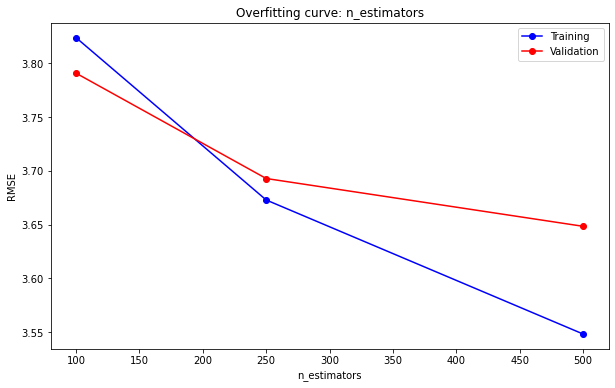

In [118]:
%%time 
plot_params(XGBRegressor, 'n_estimators', [100, 250, 500], **best_params)

500 estimators will take more time than 250 estimators so, checking with 250

In [122]:
best_params['n_estimators'] = 250

CPU times: total: 1h 37min 23s
Wall time: 15min 14s


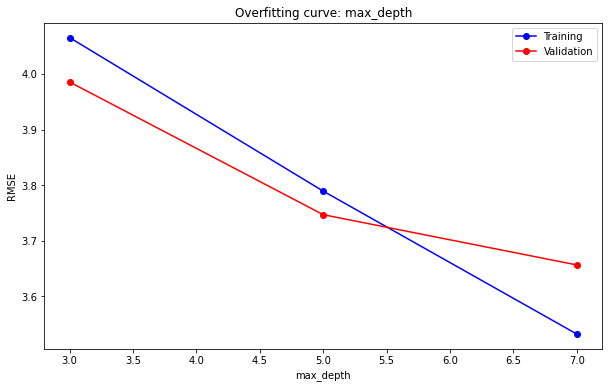

In [123]:
%%time 
plot_params(XGBRegressor, 'max_depth', [3, 5, 7], **best_params)

In [124]:
best_params['max_depth'] = 7

CPU times: total: 2h 25min 19s
Wall time: 21min 6s


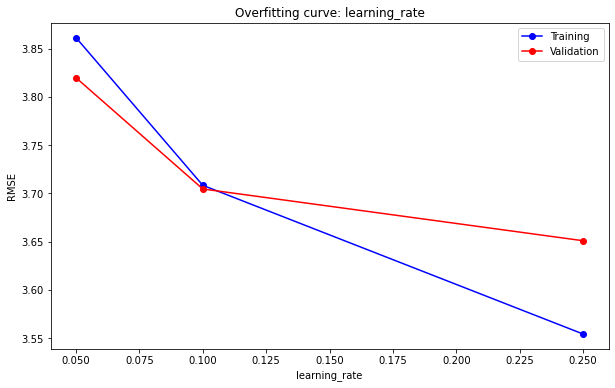

In [125]:
%%time
plot_params(XGBRegressor, 'learning_rate', [0.05, 0.1, 0.25], **best_params)

In [126]:
best_params['learning_rate'] = 0.25

In [127]:
xgb_model = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42,
                               n_estimators=500, max_depth=7, learning_rate=0.25, 
                               subsample=0.8, colsample_bytree=0.8)

In [128]:
xgb_model = evaluate(xgb_model)

train RMSE                 : 3.4243175451950507
validatin RMSE             : 3.6664155993362813
R2 Score on Validation data: 0.8567048339314687
R2 Score on training data  : 0.8753138030269726


In [129]:
pred_xgb = xgb_model.predict(test_df)
pred_xgb

array([ 8.797791, 10.489434,  4.703897, ..., 55.343765, 19.887274,
        6.349611], dtype=float32)

In [142]:
test_pred_ens2 = (pred_xgb + test_pred_lgb2)/2
test_pred_ens2

array([ 9.22414866, 10.36542918,  4.879511  , ..., 54.20343438,
       19.57770542,  6.58805058])

In [130]:
generate_submission(pred_xgb, 'xgbHyper_submission.csv')

#### Ensambled HyperXgb, LightGB2 models

In [145]:
ensamble_model_evaluation(xgb_model, model_lgb2)

train RMSE                 : 3.411982027015108
validatin RMSE             : 3.5906829488990124
R2 Score on Validation data: 0.8625634404835002
R2 Score on training data  : 0.8762105063930151


In [143]:
generate_submission(test_pred_ens2, 'xgb_lgb_submission.csv')

#### saving xgb_model

In [147]:
pickle.dump(xgb_model, open('xgb_model_taxifare.pkl', "wb"))

##### My Kaggle Submission Results

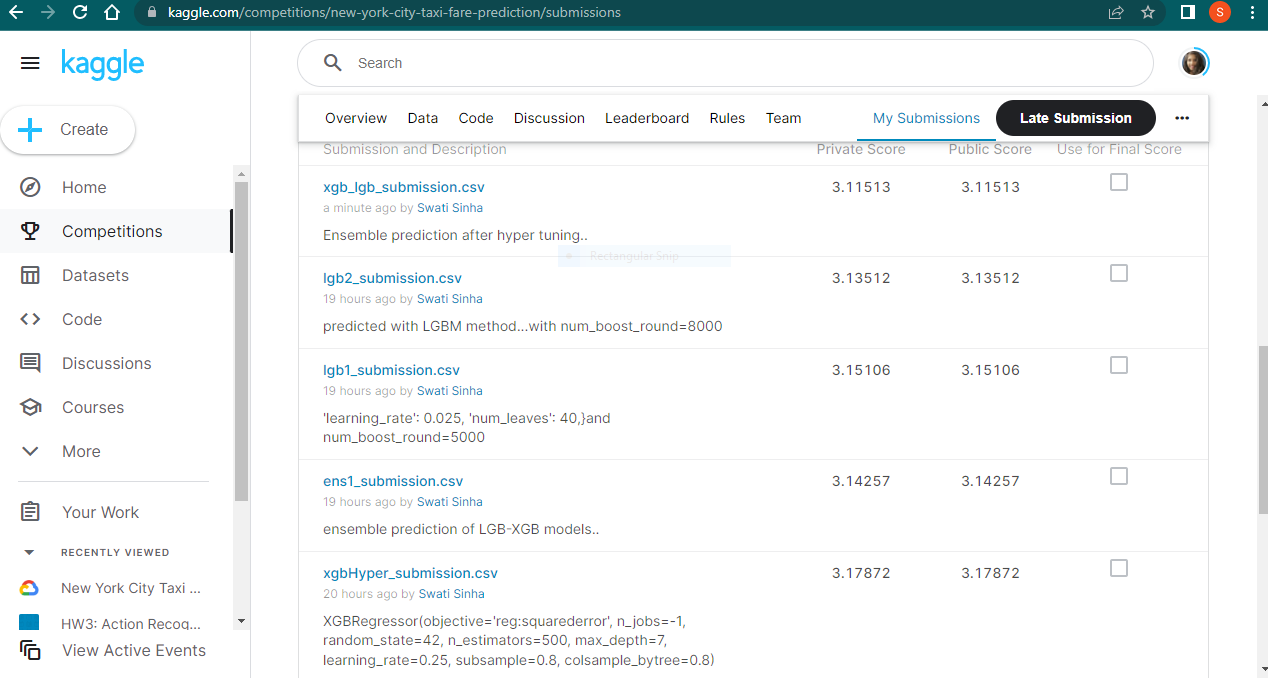

**Conclussion:-** Try to use ensemble method of  **'model_lgb2'**  &  **'xgb_model'** for best Results